![Penguins banner](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/refs/heads/main/man/figures/lter_penguins.png)
# Palmer Penguins Dataset: A Deep Dive into Penguin Ecology

Welcome to this exploration of the Palmer Penguins dataset! This dataset, a classic in the world of data science and machine learning, offers a fascinating glimpse into the lives of three penguin species inhabiting the Palmer Archipelago, Antarctica.  It's a great dataset for practicing data cleaning, exploratory data analysis (EDA), and machine learning classification techniques, especially for beginners.

This notebook will guide you through an analysis of the Palmer Penguins dataset, focusing on understanding the key features that distinguish these adorable creatures. We'll investigate the relationships between various physical characteristics and species, uncovering patterns and insights into penguin ecology.  We'll cover data loading and cleaning, perform exploratory data analysis to visualize these relationships, and potentially build predictive models to classify penguin species based on their features.

## Introduction to the Data

The Palmer Penguins dataset, originally collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, provides measurements for 344 penguins.  It includes information on three penguin species: Adelie, Chinstrap, and Gentoo.  The dataset comprises the following features:

* **species:** The species of the penguin (Adelie, Chinstrap, Gentoo). This is our target variable for classification tasks.
* **island:** The island where the penguin was observed (Torgersen, Biscoe, Dream).
* **bill_length_mm:** The length of the penguin's bill (culmen) in millimeters.
* **bill_depth_mm:** The depth of the penguin's bill in millimeters.
* **flipper_length_mm:** The length of the penguin's flipper in millimeters.
* **body_mass_g:** The body mass of the penguin in grams.
* **sex:** The sex of the penguin (Male, Female).  Note that there are some missing values in this column.

This dataset presents a great opportunity to explore the following questions:

* How do the physical characteristics of penguins vary across different species?
* Are there any relationships between bill length, bill depth, flipper length, and body mass?
* Can we accurately predict a penguin's species based on its physical measurements?
* How can we handle missing values in the 'sex' column?

Let's dive in and uncover the secrets of the Palmer Penguins!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
# If something goes wrong and you're unable to detect, comment this line!
warnings.filterwarnings("ignore", category=FutureWarning) 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv
/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv


---

# Setup

In [2]:
df = pd.read_csv('/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
# Drop entries with more than 1 entries/features missing
df.drop(df[df.isna().sum(axis=1) > 1].index, inplace=True)

In [6]:
# Numerical columns
num_df = df.select_dtypes(include='number')

# Categorical columns
cat_df = df.select_dtypes(exclude='number')

---

# Visualizations

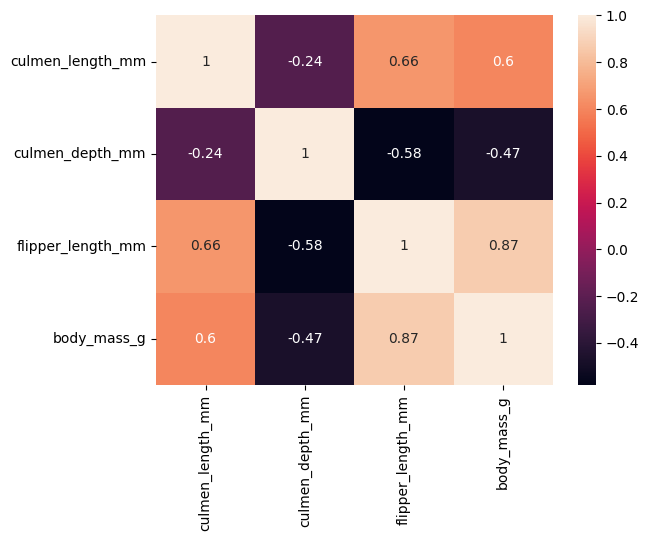

In [7]:
# plot a heatmap for correlation
sns.heatmap(round(num_df.corr(), 2), annot=True)
plt.show()

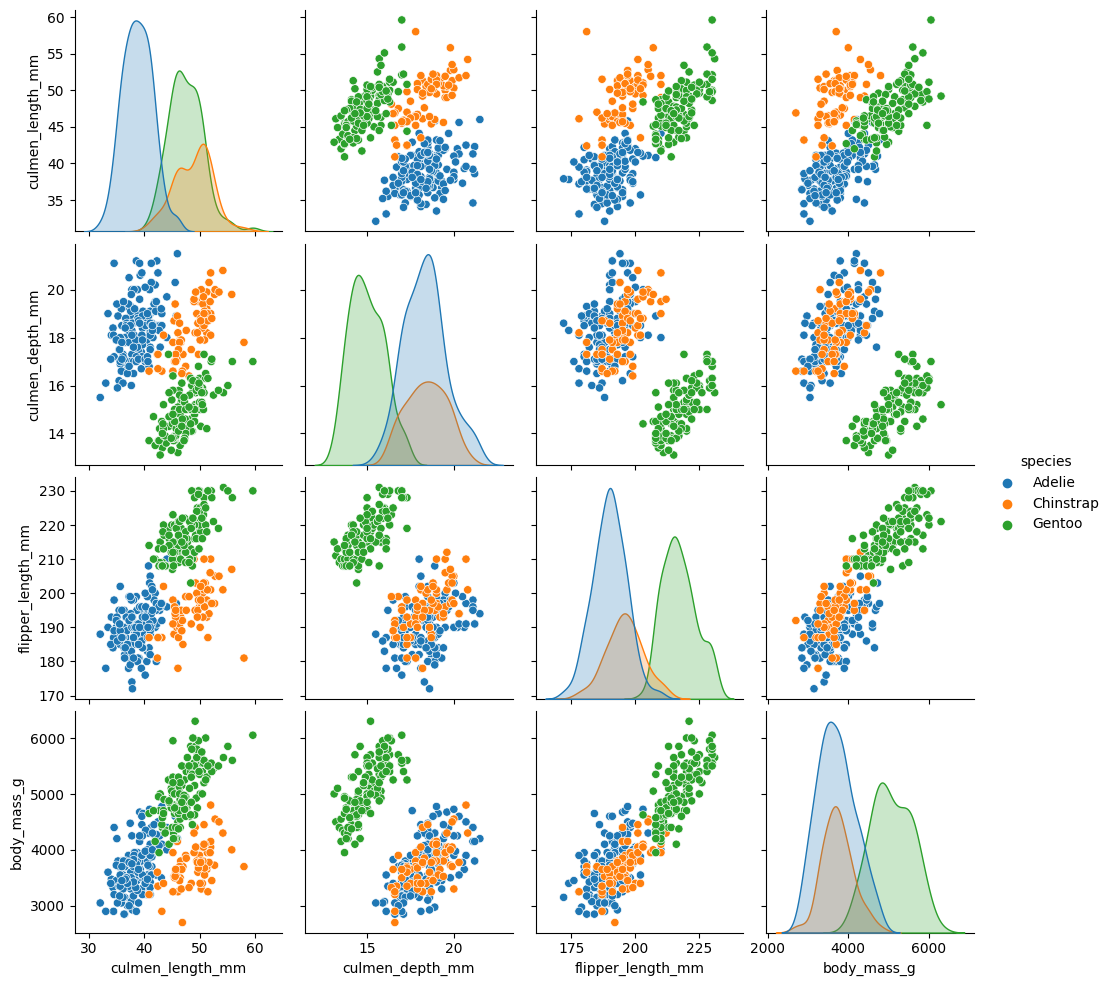

In [8]:
# Plot a pairplot to visualize the features relation using `species` as hue
#
# Observation: culmen_length_mm correlates with high values with every other numerical feature.
sns.pairplot(pd.concat([num_df, cat_df['species']], axis=1), hue='species')
plt.show()

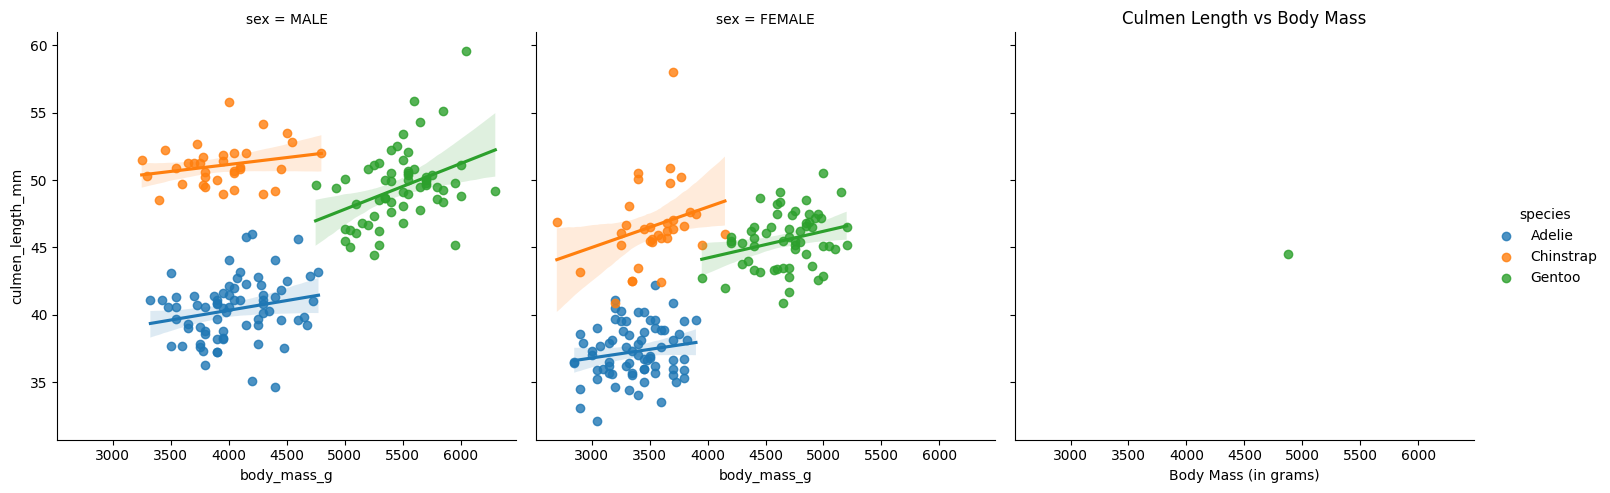

In [9]:
sns.lmplot(
    data=pd.concat([num_df, cat_df[['species', 'sex']]], axis=1), 
    x="body_mass_g", y="culmen_length_mm",
    col="sex",
    hue="species",
)
plt.ylabel("Culmen Length (in mm)")
plt.xlabel("Body Mass (in grams)")
plt.title("Culmen Length vs Body Mass")
plt.show()

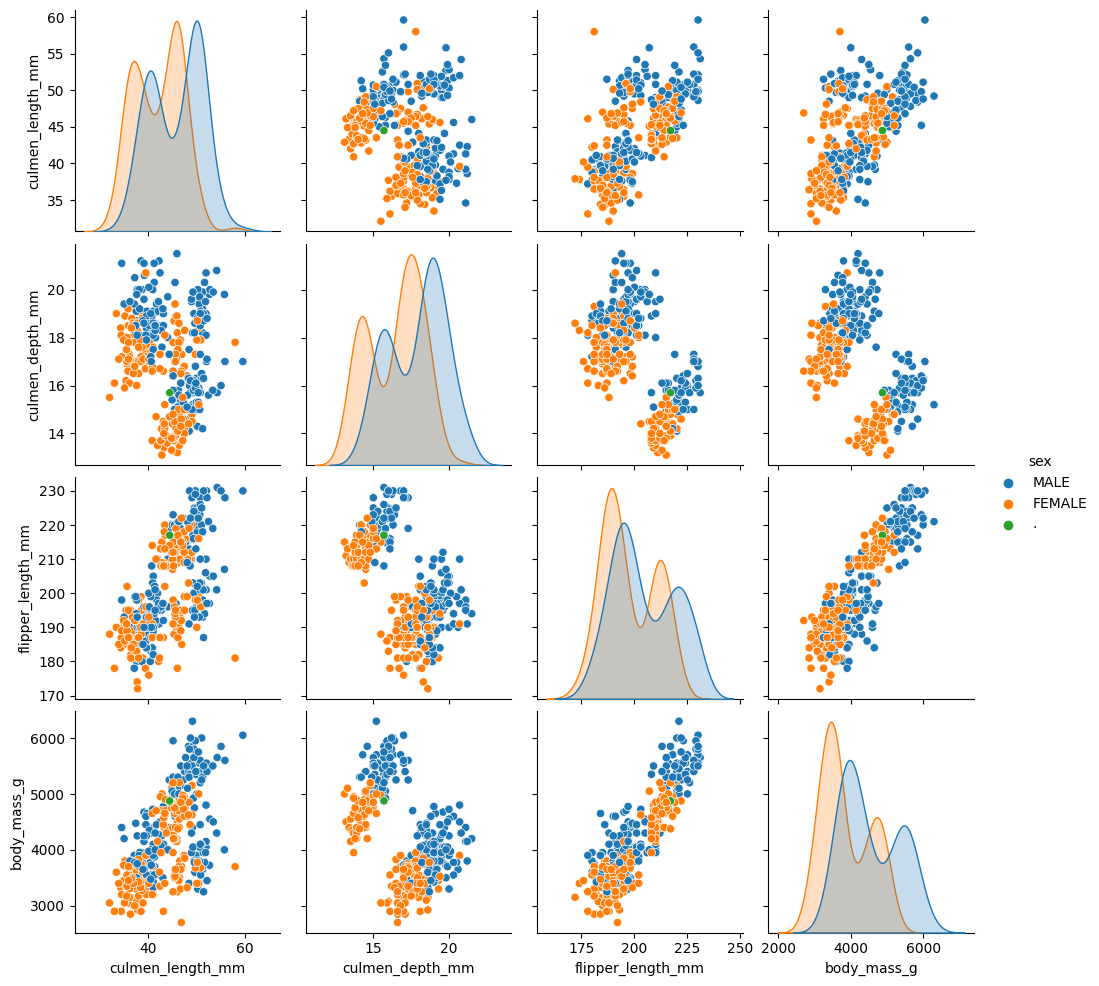

In [10]:
# Plot a pairplot to visualize the features relation using `sex` as hue
#
# Observation: culmen_depth_mm helps differentiate penguins more clearly
sex_col = cat_df['sex'].fillna(cat_df['sex'].mode())
sns.pairplot(pd.concat([num_df, sex_col], axis=1), hue='sex')
plt.show()

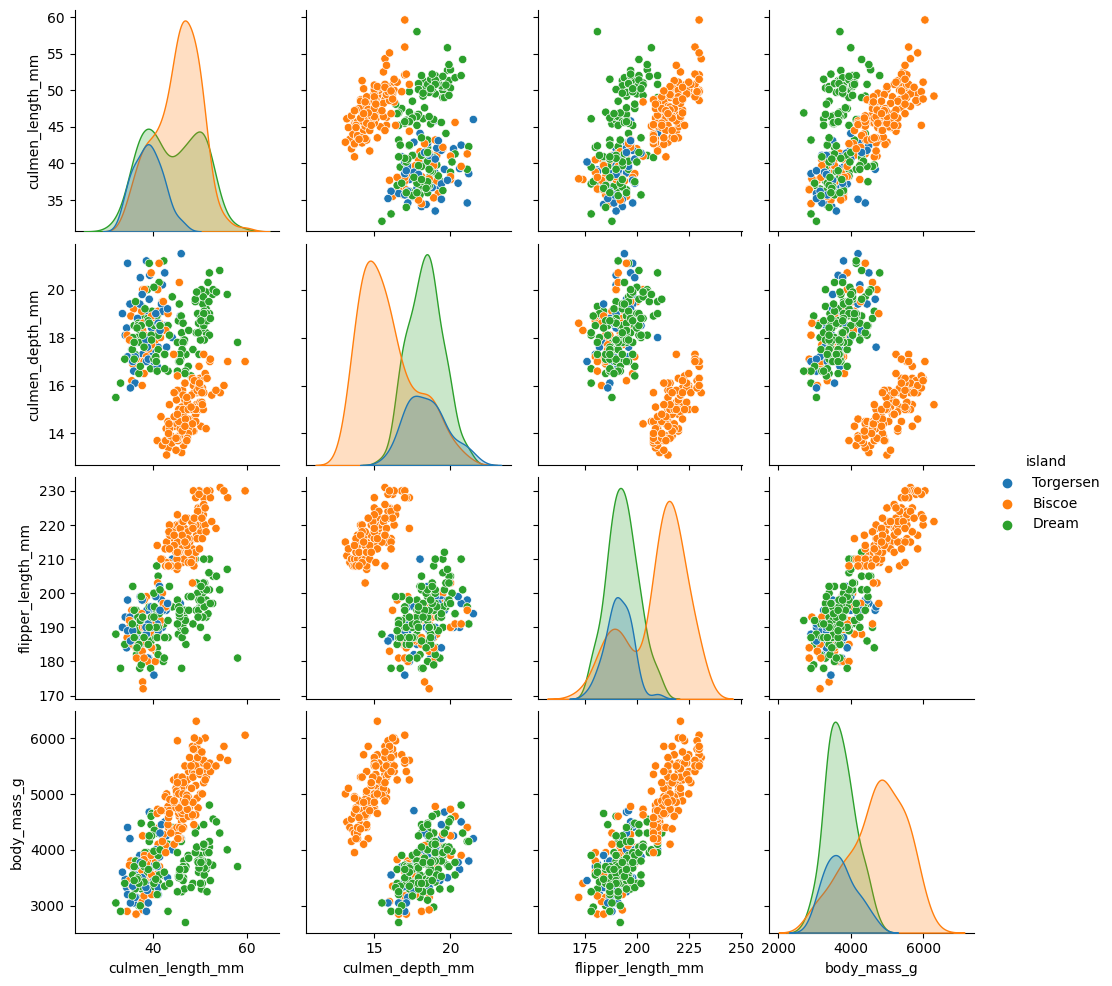

In [11]:
# Plot a pairplot to visualize the features relation using `island` as hue
#
# Observation: `Torgreson` and `Dream` are really similar.
sns.pairplot(pd.concat([num_df, cat_df['island']], axis=1), hue='island')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

---

# Predictions: Part I
using Numerical Features only

In [13]:
random_state = 42

def evaluate(X: pd.DataFrame, y: pd.DataFrame):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=random_state)

    rf = RandomForestClassifier(random_state=random_state)
    
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    print(classification_report(y_test, y_pred))

    features = zip(num_df.columns, rf.feature_importances_)
    mvp = [0, 0]
    
    for key, score in features:
        if score > mvp[0]:
            mvp = (score, key)
        print(key, '\t', score)
    
    print("\n\nMost Important Feature:", mvp[1])

    return rf

## 1. Predicting Species of Penguins

In [14]:
X = num_df
y = cat_df['species']

_ = evaluate(X, y)

              precision    recall  f1-score   support

      Adelie       1.00      0.91      0.96        35
   Chinstrap       0.80      1.00      0.89        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           0.96        69
   macro avg       0.93      0.97      0.95        69
weighted avg       0.97      0.96      0.96        69

culmen_length_mm 	 0.4177557871920803
culmen_depth_mm 	 0.19182971123338766
flipper_length_mm 	 0.30655103834619135
body_mass_g 	 0.08386346322834068


Most Important Feature: culmen_length_mm


## 2. Predicting Sex of Penguins

In [15]:
# There are some missing values for `sex` feature
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [16]:
# handle NaN and '.' values
missing_sex_index = df[df['sex'].isna() | (df['sex'] == '.')].index

X = num_df.drop(missing_sex_index)
y = cat_df['sex'].drop(missing_sex_index)

model = evaluate(X, y)

              precision    recall  f1-score   support

      FEMALE       0.89      0.89      0.89        37
        MALE       0.87      0.87      0.87        30

    accuracy                           0.88        67
   macro avg       0.88      0.88      0.88        67
weighted avg       0.88      0.88      0.88        67

culmen_length_mm 	 0.22810905898950326
culmen_depth_mm 	 0.3551314852221376
flipper_length_mm 	 0.12467462424772184
body_mass_g 	 0.2920848315406373


Most Important Feature: culmen_depth_mm


### Predict missing sex values

Using the same model to predict the missing sex values in the dataset.

In [17]:
# Predict missing `sex` values
X_test_missing = num_df.loc[missing_sex_index]

y_pred_missing = pd.DataFrame(model.predict(X_test_missing), index=X_test_missing.index)

pd.concat([X_test_missing, y_pred_missing], axis=1).rename(columns={0: 'sex'})

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,34.1,18.1,193.0,3475.0,FEMALE
9,42.0,20.2,190.0,4250.0,MALE
10,37.8,17.1,186.0,3300.0,FEMALE
11,37.8,17.3,180.0,3700.0,FEMALE
47,37.5,18.9,179.0,2975.0,FEMALE
246,44.5,14.3,216.0,4100.0,FEMALE
286,46.2,14.4,214.0,4650.0,FEMALE
324,47.3,13.8,216.0,4725.0,FEMALE
336,44.5,15.7,217.0,4875.0,FEMALE


## 3. Predicting Islands for Penguins

In [18]:
X = num_df
y = cat_df['island']

_ = evaluate(X, y)

              precision    recall  f1-score   support

      Biscoe       0.83      0.75      0.79        32
       Dream       0.56      0.86      0.68        22
   Torgersen       0.33      0.13      0.19        15

    accuracy                           0.65        69
   macro avg       0.57      0.58      0.55        69
weighted avg       0.63      0.65      0.62        69

culmen_length_mm 	 0.24841591021961262
culmen_depth_mm 	 0.29809561862908146
flipper_length_mm 	 0.27066655598859723
body_mass_g 	 0.18282191516270865


Most Important Feature: culmen_depth_mm


---

# Predictions: Part II
Use entire dataset to predict the species of the penguins

## Step 1: Impute missing values
Instead of using mode, we'll impute the predicted values.

In [19]:
cat_df.loc[y_pred_missing.index, 'sex'] = y_pred_missing[0]

## Step 2: Encode categorical features
We'll use pandas get_dummies to encode the categorical features.

In [20]:
encoded_cat_df = pd.get_dummies(cat_df.drop('species', axis=1), dtype=int)

## Step 3: Building train and test dataset

In [21]:
X = pd.concat([num_df, encoded_cat_df], axis=1)
y = cat_df['species']

_ = evaluate(X, y)

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        35
   Chinstrap       0.92      1.00      0.96        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

culmen_length_mm 	 0.3432912396189029
culmen_depth_mm 	 0.16176673586765614
flipper_length_mm 	 0.2602371952265832
body_mass_g 	 0.07663317541415993


Most Important Feature: culmen_length_mm


## Results

Woah! Using the entire dataset we're able to get an `f1_score` for 0.99.

---

# Remarks

Our Random Forest model, trained with simple one-hot encoding, achieved a high score. However, this suggests potential overfitting.  The model may be too specific to this dataset, hindering generalization to new data.

To improve robustness:

1. **Grid Search:** Tune hyperparameters for optimal performance and generalization.
2. **Feature Scaling:** Normalize `body_mass_g` and other numerical features.
3. **Regularization:** Control tree complexity to prevent overfitting.
4. **Cross-Validation:** Use k-fold cross-validation for robust performance evaluation.
5. **Feature Engineering/Selection:** Explore and select relevant features.

These steps should create a more generalizable model.